
### Model Training


#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Modeling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 





#### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)


In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ",end=" " )
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:     ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [7]:
y=df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

### seperate categorical and numerical feature

In [9]:
# create coloumn transformer with 3types of transformer
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns



In [10]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformaer = OneHotEncoder()

preprocessor=ColumnTransformer(
    [('OneHotEncoder',oh_transformaer,cat_feature),
     ('StandardScaler',numeric_transformer,num_feature)
        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
#seperate dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape,X_test.shape 

((700, 19), (300, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,mse,rmse,r2


models ={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regression":KNeighborsRegressor(),
    "Descision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list =[]
r2_list=[]

for i in models:
    model = models[i]
    model.fit(X_train,Y_train) #train model
    
    #make prediction
    y_train_pred =  model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluate model
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(Y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(Y_test,y_test_pred)
    
    print(i)
    model_list.append(i)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

In [15]:
models ={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regression":KNeighborsRegressor(),
    "Descision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list =[]
r2_list=[]


In [16]:
def comapre_model(model_name,model):
    # model = models[i]
    model.fit(X_train,Y_train) #train model

    #make prediction
    y_train_pred =  model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluate model
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(Y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(Y_test,y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

In [18]:
comapre_model("Linear Regression",models["Linear Regression"])

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2540
- Mean Absolute Error: 4.1932
- Mean squared Error: 27.6041
- R2 Score: 0.8749
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5688
- Mean Absolute Error: 4.4319
- Mean squared Error: 31.0111
- R2 Score: 0.8754




In [19]:
comapre_model("Lasso",models["Lasso"])

Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- Mean squared Error: 42.3875
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- Mean squared Error: 47.2041
- R2 Score: 0.8103




In [20]:
comapre_model("Ridge",models["Ridge"])

Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- Mean squared Error: 27.5484
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- Mean squared Error: 30.8757
- R2 Score: 0.8759




In [21]:
comapre_model("K-Neighbors Regression",models["K-Neighbors Regression"])

K-Neighbors Regression
Model performance for Training set
- Root Mean Squared Error: 5.6788
- Mean Absolute Error: 4.5063
- Mean squared Error: 32.2489
- R2 Score: 0.8538
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.5231
- Mean Absolute Error: 5.8407
- Mean squared Error: 56.5975
- R2 Score: 0.7725




In [22]:
comapre_model("Descision Tree",models["Descision Tree"])

Descision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2988
- Mean Absolute Error: 0.0214
- Mean squared Error: 0.0893
- R2 Score: 0.9996
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.3516
- Mean Absolute Error: 6.6900
- Mean squared Error: 69.7500
- R2 Score: 0.7197




In [23]:
comapre_model("Random Forest Regressor",models["Random Forest Regressor"])

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3480
- Mean Absolute Error: 1.8670
- Mean squared Error: 5.5129
- R2 Score: 0.9750
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1727
- Mean Absolute Error: 4.8391
- Mean squared Error: 38.1017
- R2 Score: 0.8469




In [24]:
comapre_model("XGBRegressor",models["XGBRegressor"])

XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.8957
- Mean Absolute Error: 0.5657
- Mean squared Error: 0.8022
- R2 Score: 0.9964
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8427
- Mean Absolute Error: 5.4686
- Mean squared Error: 46.8223
- R2 Score: 0.8118




In [25]:
comapre_model("CatBoostRegressor",models["CatBoostRegressor"])

Learning rate set to 0.038699
0:	learn: 14.4808454	total: 281ms	remaining: 4m 40s
1:	learn: 14.1310727	total: 283ms	remaining: 2m 21s
2:	learn: 13.7965835	total: 285ms	remaining: 1m 34s
3:	learn: 13.4565295	total: 287ms	remaining: 1m 11s
4:	learn: 13.1359703	total: 290ms	remaining: 57.7s
5:	learn: 12.8658898	total: 295ms	remaining: 48.9s
6:	learn: 12.5677905	total: 300ms	remaining: 42.5s
7:	learn: 12.3045042	total: 302ms	remaining: 37.5s
8:	learn: 12.0537026	total: 304ms	remaining: 33.5s
9:	learn: 11.7664910	total: 306ms	remaining: 30.3s
10:	learn: 11.4762647	total: 308ms	remaining: 27.7s
11:	learn: 11.2358710	total: 309ms	remaining: 25.5s
12:	learn: 11.0314718	total: 315ms	remaining: 23.9s
13:	learn: 10.8022615	total: 319ms	remaining: 22.4s
14:	learn: 10.5738212	total: 321ms	remaining: 21.1s
15:	learn: 10.3372505	total: 323ms	remaining: 19.9s
16:	learn: 10.1314991	total: 332ms	remaining: 19.2s
17:	learn: 9.9243421	total: 335ms	remaining: 18.3s
18:	learn: 9.7235399	total: 338ms	remaini

In [26]:
comapre_model("AdaBoostRegressor",models["AdaBoostRegressor"])

AdaBoostRegressor
Model performance for Training set
- Root Mean Squared Error: 5.8770
- Mean Absolute Error: 4.7669
- Mean squared Error: 34.5395
- R2 Score: 0.8434
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4299
- Mean Absolute Error: 5.0747
- Mean squared Error: 41.3434
- R2 Score: 0.8338




In [28]:
r2_list,model_list

([0.8753627661417278,
  0.8102810073900306,
  0.875906778443454,
  0.7725279324444705,
  0.719666309351923,
  0.8468646184987815,
  0.8118156534372252,
  0.8521075771241958,
  0.8338358920095688],
 ['Linear Regression',
  'Lasso',
  'Ridge',
  'K-Neighbors Regression',
  'Descision Tree',
  'Random Forest Regressor',
  'XGBRegressor',
  'CatBoostRegressor',
  'AdaBoostRegressor'])

### Results

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.875363
7,CatBoostRegressor,0.852108
5,Random Forest Regressor,0.846865
8,AdaBoostRegressor,0.833836
6,XGBRegressor,0.811816
1,Lasso,0.810281
3,K-Neighbors Regression,0.772528
4,Descision Tree,0.719666


## Linear Regression

In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.54


## Plot y_pred and y_test

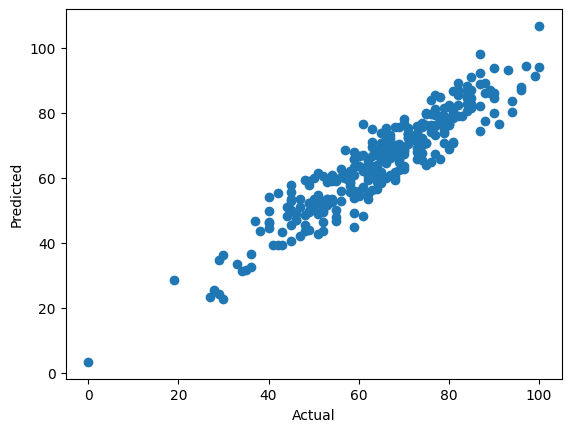

In [32]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

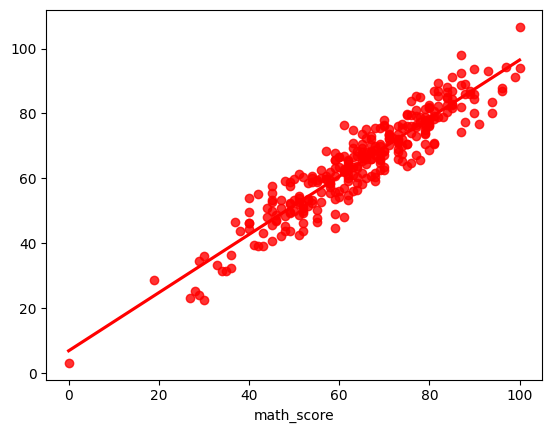

In [33]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='red')